In [ ]:

import pandas as pd
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
nltk.download('wordnet')
import numpy as np
import math
import matplotlib.pyplot as plt
import re
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### clean keywords

In [ ]:
pathfire='/content/drive/My Drive/disaster_tweets.csv'


df = pd.read_csv(pathfire)
df

# cleaning process

df.drop('id',inplace=True, axis = 1)
print("Unterschiedliche Keywords vor cleaning: ",df.keyword.nunique())
df_unique=pd.DataFrame(data=df.keyword.unique(),  columns=["col1"])
df_unique.dropna(inplace=True)

stemmer = PorterStemmer()
df_unique['keyword_stem']=df_unique['col1'].apply(lambda x: stemmer.stem(x))


print("Unterschiedliche Keywords nach stemming: ",df_unique.keyword_stem.nunique())
df_unique.keyword_stem.unique()


# manuelles vereinheitlichen
einheits_dict={'burning%20build':'fire',
               'buildings%20burn':'fire',
               'buildings%20on%20fir':'fire',
               'bloodi': 'blood',
               'bleed': 'blood',
               'bush%20fir':'fire',
               'dead':'death',
               'explod':'explos',
               'blown%20up':'explos',
               'bridge%20collaps':'damag',
               'demolish':'damag',
               'demolit':'damag',
               'injuri':'injur',
               'apocalyps':'catastroph',
               'armageddon':'catastroph',
               'arsonist':'arson',
               'mass%20murder':'mass%20murd',
               'panick':'panic',
               'disast':'catastroph',
               'armi':'militari',
               'earthquak':'catastroph',
               'hellfir':'fire',
               'tornado':'hurrican',
               'cyclon':'hurrican',
               'terrorist':'terror',
               'nuclear%20disast':'meltdown',
               'tsunami':'flood',
               'surviv': 'survivor',
               'traumatis':'trauma',
               'wild%20fir': 'wildfir',
               'twister':'hurrican',
               'typhoon':'hurrican',
               'suicide%20bomb':'bomb',
               'whirlwind':'hurrican',
               'blizzard':'hurican',
               'collid':'collis',
               'destruct':'destroy',
               'devast':'destroy',
               'mass%20murd':'massacr',
               'crash':'crush',
               'sunk':'sink',
               'lava':'volcano'
               }


df_unique['keywords_final']=df_unique['keyword_stem'].replace(einheits_dict)

print("Unterschiedliche Keywords nach stemming und manuellem einsortieren: ",df_unique.keywords_final.nunique())
df_unique.keywords_final.unique()


Unterschiedliche Keywords vor cleaning:  221
Unterschiedliche Keywords nach stemming:  166
Unterschiedliche Keywords nach stemming und manuellem einsortieren:  126


array(['ablaz', 'accid', 'aftershock', 'airplane%20accid', 'ambul',
       'annihil', 'catastroph', 'militari', 'arson', 'attack', 'avalanch',
       'battl', 'bioterror', 'blaze', 'blood', 'blew%20up', 'blight',
       'hurican', 'explos', 'body%20bag', 'bomb', 'damag', 'fire', 'burn',
       'casualti', 'chemical%20emerg', 'cliff%20fal', 'collaps', 'collis',
       'crush', 'curfew', 'hurrican', 'danger', 'death', 'debri', 'delug',
       'derail', 'desol', 'destroy', 'deton', 'displac', 'drought',
       'drown', 'dust%20storm', 'electrocut', 'emerg', 'emergency%20plan',
       'emergency%20servic', 'engulf', 'epicentr', 'evacu', 'eyewit',
       'famin', 'fatal', 'fear', 'fire%20truck', 'first%20respond',
       'flame', 'flatten', 'flood', 'forest%20fir', 'hail', 'hailstorm',
       'harm', 'hazard', 'heat%20wav', 'hijack', 'hostag', 'injur',
       'inund', 'landslid', 'volcano', 'lightn', 'loud%20bang', 'massacr',
       'mass%20murd', 'mayhem', 'meltdown', 'mudslid', 'natural%2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


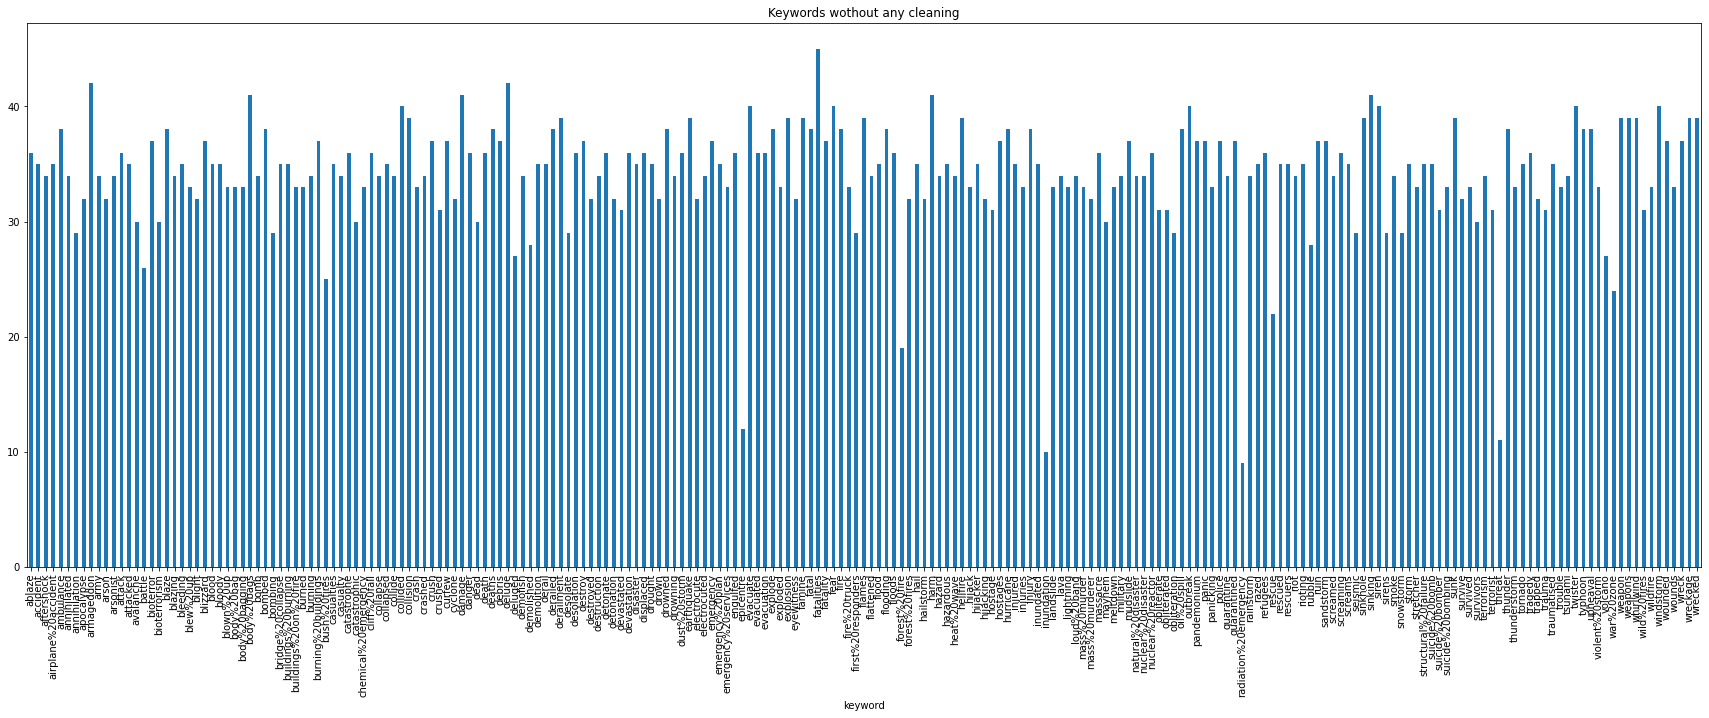

In [ ]:


plt.figure(figsize=(30,10))
df.groupby('keyword')['keyword'].count().plot(kind='bar')
plt.title('Keywords wothout any cleaning')
plt.show()

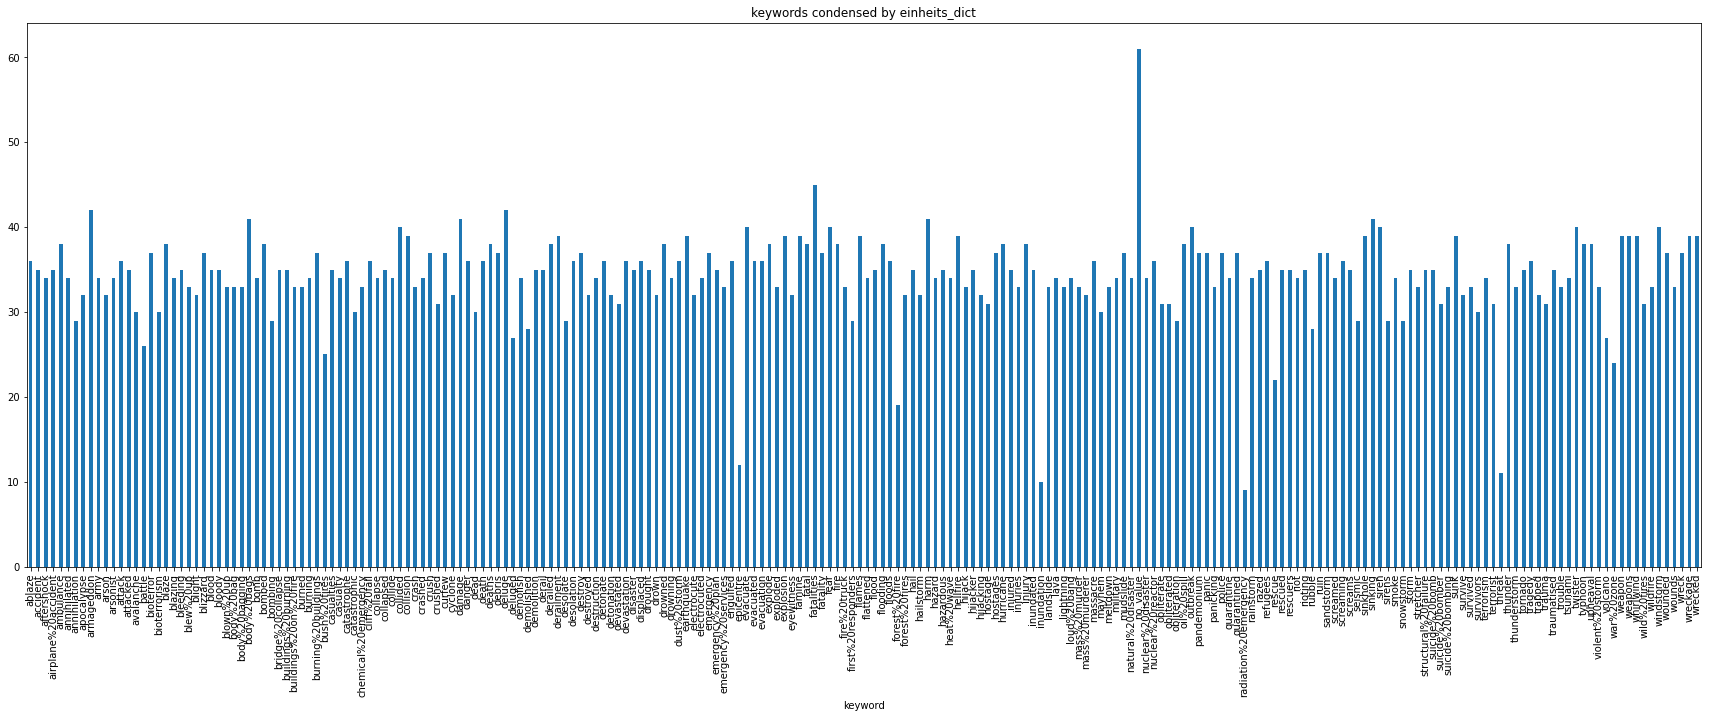

In [ ]:
import numpy as np
import math
df.fillna('no_value',inplace=True)
df['keyword_stem']=df['keyword'].apply(lambda x: stemmer.stem(x))
df['keywords_final']=df['keyword_stem'].replace(einheits_dict)
plt.figure(figsize=(30,10))
df.groupby('keyword')['keyword'].count().plot(kind='bar')
plt.title("keywords condensed by einheits_dict")
plt.show()

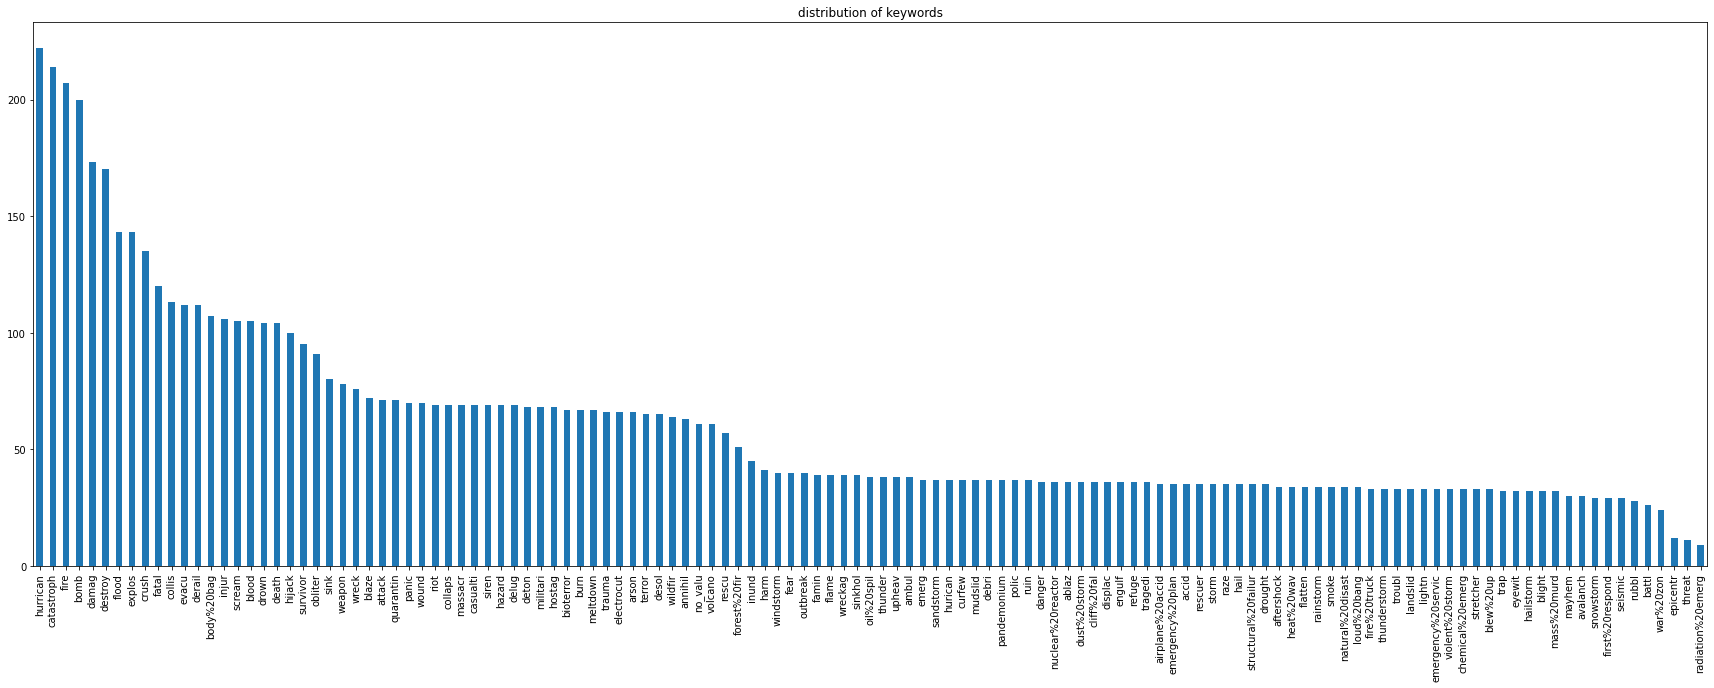

In [ ]:
plt.figure(figsize=(30,10))
df['keywords_final'].value_counts().plot(kind='bar')

plt.title("distribution of keywords")
plt.show()

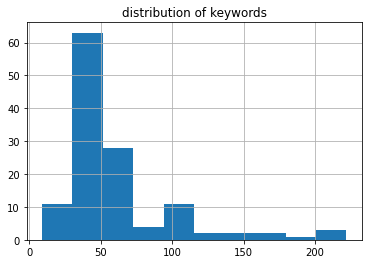

In [ ]:
df['keywords_final'].value_counts().hist()
plt.title("distribution of keywords")
plt.show()

In [ ]:
df.location.unique()

array(['no_value', 'Birmingham', 'Est. September 2012 - Bristol', ...,
       'Vancouver, Canada', 'London ', 'Lincoln'], dtype=object)

In [ ]:
df.location.nunique()

3342

In [ ]:
df['location'].value_counts()

no_value                        2533
USA                              104
New York                          71
United States                     50
London                            45
                                ... 
Docker container                   1
Nigeria, Global                    1
buenos aires argentina             1
Cardiff, Wales                     1
Timaru District, New Zealand       1
Name: location, Length: 3342, dtype: int64

In [ ]:
# no action for location until requested


### clean text

In [ ]:
# text cleaning

df.text

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

In [ ]:
# erase punctuation

def clean_text(text):
  # get rid of all unwanted punctuation and digits
  text = text.replace("´", "'")

  digi_punct = "[^a-zA-Z' ]"
  text = re.sub(digi_punct, " ", text)

  text = " ".join(text.split())

  text = text.lower()

  return text

In [ ]:

df['clean']=df['text'].apply(lambda text: clean_text(text))

In [ ]:
'''
# tokenize

tokenizer = nltk.tokenize.WordPunctTokenizer()

df['clean']=df['clean'].apply(lambda text: nltk.word_tokenize(text))
'''

"\n# tokenize\n\ntokenizer = nltk.tokenize.WordPunctTokenizer()\n\ndf['clean']=df['clean'].apply(lambda text: nltk.word_tokenize(text))\n"

In [ ]:
df['clean']

0       our deeds are the reason of this earthquake ma...
1                   forest fire near la ronge sask canada
2       all residents asked to 'shelter in place' are ...
3       people receive wildfires evacuation orders in ...
4       just got sent this photo from ruby alaska as s...
                              ...                        
7608    two giant cranes holding a bridge collapse int...
7609    aria ahrary thetawniest the out of control wil...
7610    m utc km s of volcano hawaii http t co zdtoyd ebj
7611    police investigating after an e bike collided ...
7612    the latest more homes razed by northern califo...
Name: clean, Length: 7613, dtype: object

In [ ]:
# stemmer & stopwords

my_stopwords = stopwords.words('english')

df["clean"] = df["clean"].apply(
    lambda text: " ".join([stemmer.stem(word) for word in text.split() if word not in my_stopwords]))

In [ ]:
from sklearn.model_selection import train_test_split
X = df['clean']
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape,y_test.shape)

(6090,) (6090,) (1523,) (1523,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

count_vectorizer = CountVectorizer()
bag_of_words = count_vectorizer.fit_transform(X_train)

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(X_train)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe_tfidf = make_pipeline(TfidfVectorizer(),LogisticRegression())
cross_val_score(pipe_tfidf, X_train, y_train).mean()

0.78752052545156

In [ ]:
pipe_count = make_pipeline(CountVectorizer(),LogisticRegression())
cross_val_score(pipe_count, X_train, y_train).mean()

0.7898193760262726

Text(0.5, 1.0, 'pred for countV & LogReg')

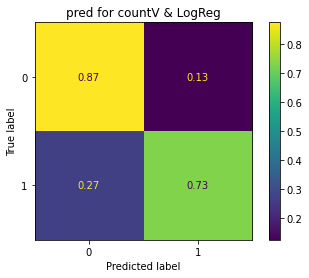

In [ ]:
from sklearn.metrics import plot_confusion_matrix

pipe_count.fit(X_train, y_train)
plot_confusion_matrix(pipe_count,X_test,y_test, normalize='true')
plt.title('pred for countV & LogReg')


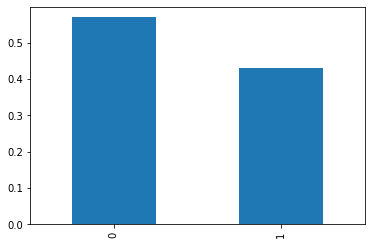

In [ ]:
# distribution of y

df.target.value_counts(normalize=True).plot(kind='bar')


### new approach: Day2

-> Markus

In [ ]:
df.head()

,keyword,location,text,target,keyword_stem,keywords_final,clean
0,no_value,no_value,Our Deeds are the Reason of this #earthquake M...,1,no_valu,no_valu,deed reason earthquak may allah forgiv us
1,no_value,no_value,Forest fire near La Ronge Sask. Canada,1,no_valu,no_valu,forest fire near la rong sask canada
2,no_value,no_value,All residents asked to 'shelter in place' are ...,1,no_valu,no_valu,resid ask 'shelter place' notifi offic evacu s...
3,no_value,no_value,"13,000 people receive #wildfires evacuation or...",1,no_valu,no_valu,peopl receiv wildfir evacu order california
4,no_value,no_value,Just got sent this photo from Ruby #Alaska as ...,1,no_valu,no_valu,got sent photo rubi alaska smoke wildfir pour ...


# Visualization of keyword distribution

In [ ]:
df_alerts = df[df.target==1].copy()
df_alerts.head(3)

,keyword,location,text,target,keyword_stem,keywords_final
0,no_value,no_value,Our Deeds are the Reason of this #earthquake M...,1,no_valu,no_valu
1,no_value,no_value,Forest fire near La Ronge Sask. Canada,1,no_valu,no_valu
2,no_value,no_value,All residents asked to 'shelter in place' are ...,1,no_valu,no_valu


In [ ]:
#df.groupby(['target']).count()['text'].plot(kind='bar')
alert_no = df.groupby(['target']).count()['text'][0]
alert_yes = df.groupby(['target']).count()['text'][1]
print("No alert: \t",alert_no,"\nAlert:\t\t", alert_yes)


No alert: 	 4342 
Alert:		 3271


In [ ]:
kw_pure_alert_yes=df[df.target==1].groupby(['keyword']).count().sort_values('text',ascending=False)['text']
kw_pure_alert_no=df[df.target==0].groupby(['keyword']).count().sort_values('text',ascending=False)['text']
df_kw_pure=pd.DataFrame(columns=['alert_yes','alert_no'])
kw_sum=kw_pure_alert_no + kw_pure_alert_yes
print("Original keywords")
print("Anzahl keywords für Alert=yes",len(kw_pure_alert_yes))
print("Anzahl keywords für Alert=no",len(kw_pure_alert_no))
print("Alle keywords:",len(kw_sum))
for key in kw_sum.index:
  y=0
  n=0
  if key in kw_pure_alert_yes:
    y=kw_pure_alert_yes[key]
  if key in kw_pure_alert_no:
    n=kw_pure_alert_no[key]
  df_kw_pure.loc[key]=[y,n]
df_kw_pure.head(3)

Original keywords
Anzahl keywords für Alert=yes 221
Anzahl keywords für Alert=no 219
Alle keywords: 222


,alert_yes,alert_no
ablaze,13,23
accident,24,11
aftershock,0,34


In [ ]:
kw_final_alert_yes=df[df.target==1].groupby(['keywords_final']).count().sort_values('text',ascending=False)['text']
kw_final_alert_no=df[df.target==0].groupby(['keywords_final']).count().sort_values('text',ascending=False)['text']
kw_final_alert_yes['bomb']
kw_final_alert_no['bomb']
df_kw_final=pd.DataFrame(columns=['alert_yes','alert_no'])
kw_sum=kw_final_alert_no + kw_final_alert_yes
print("Cleaned keywords")
print("Anzahl keywords für Alert=yes",len(kw_final_alert_yes))
print("Anzahl keywords für Alert=no",len(kw_final_alert_no))
print("Alle keywords:",len(kw_sum))
for key in kw_sum.index:
  y=0
  n=0
  if key in kw_final_alert_yes:
    y=kw_final_alert_yes[key]
  if key in kw_final_alert_no:
    n=kw_final_alert_no[key]
  df_kw_final.loc[key]=[y,n]
df_kw_final.head(3)

Cleaned keywords
Anzahl keywords für Alert=yes 126
Anzahl keywords für Alert=no 125
Alle keywords: 127


,alert_yes,alert_no
ablaz,13,23
accid,24,11
aftershock,0,34


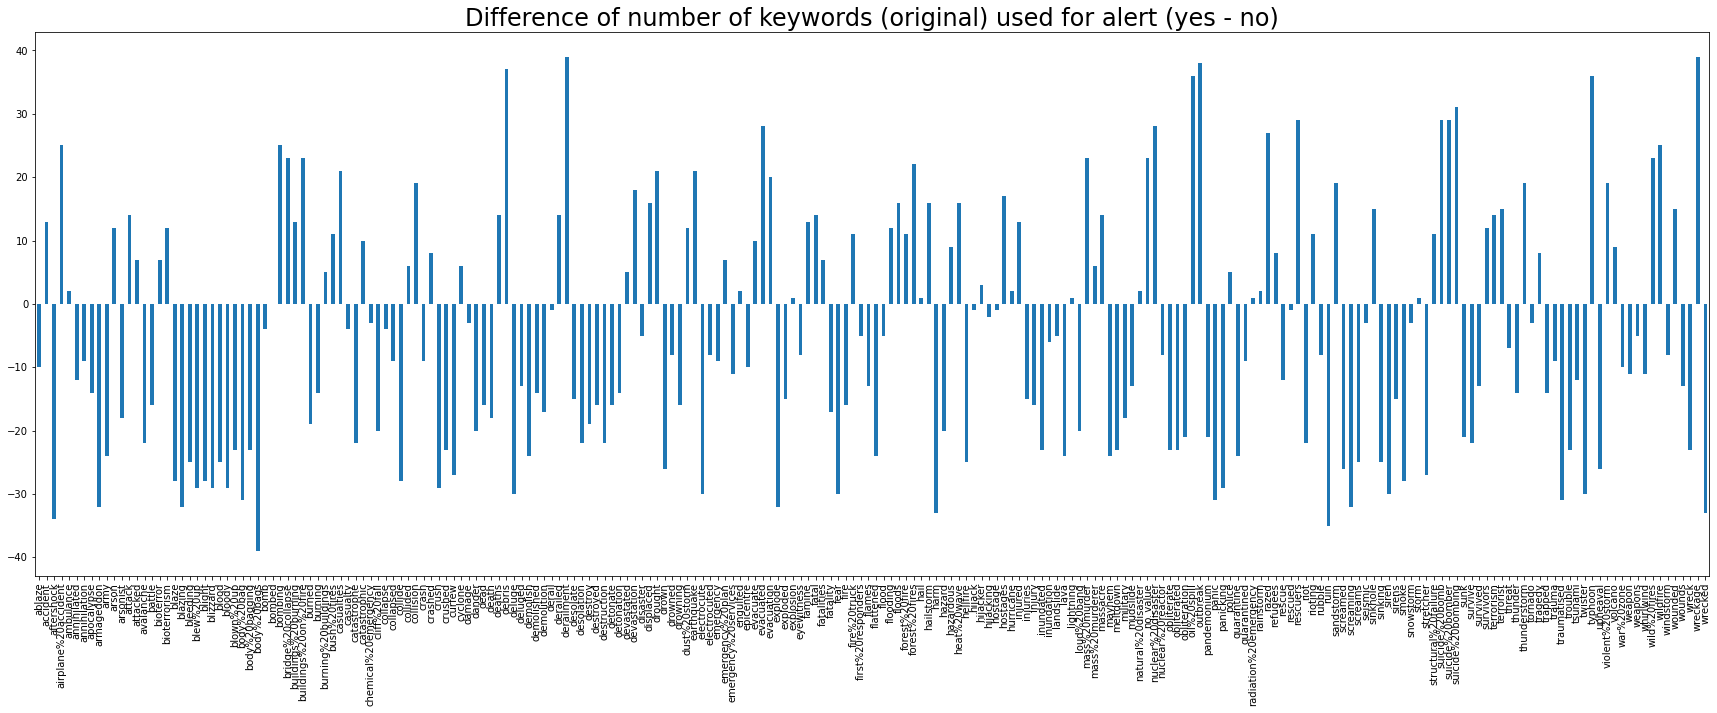

In [ ]:
plt.figure(figsize=(30,10))
df_kw_pure['diff']=df_kw_pure.alert_yes - df_kw_pure.alert_no
df_kw_pure['diff'].plot(kind='bar')
plt.title("Difference of number of keywords (original) used for alert (yes - no)",fontsize=24)
plt.show()

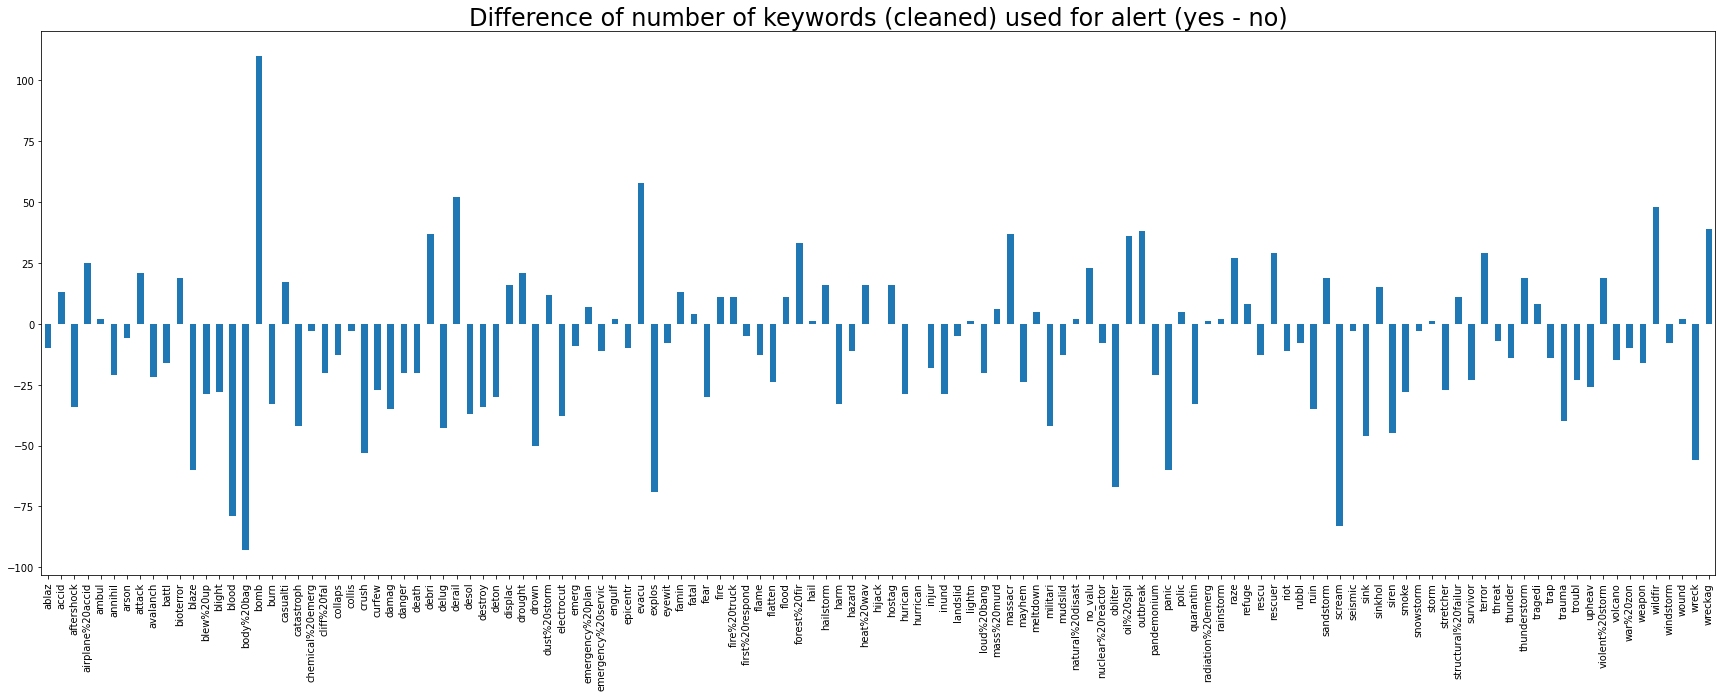

In [ ]:
plt.figure(figsize=(30,10))
df_kw_final['diff']=df_kw_final.alert_yes - df_kw_final.alert_no
df_kw_final['diff'].plot(kind='bar')
plt.title("Difference of number of keywords (cleaned) used for alert (yes - no)", fontsize=24)
plt.show()

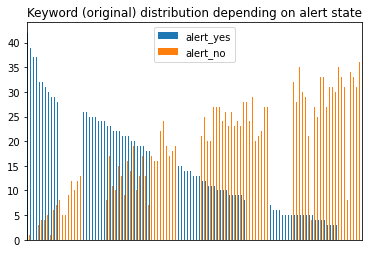

In [ ]:
df_kw_pure[['alert_yes','alert_no']].sort_values(by='alert_yes',ascending=False).plot(kind='bar')
plt.xticks([])
plt.title("Keyword (original) distribution depending on alert state")
plt.show()

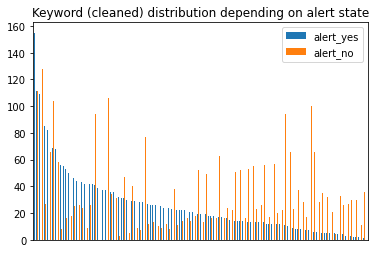

In [ ]:
df_kw_final[['alert_yes','alert_no']].sort_values(by='alert_yes',ascending=False).plot(kind='bar')
plt.xticks([])
plt.title("Keyword (cleaned) distribution depending on alert state")
plt.show()

### Verbesserung von KLassifikation durch Vektorisierung von Textblöcken

In [ ]:
from sklearn.model_selection import train_test_split
X = df['clean']
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

normal: ngram = 1; analyzer='word'

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

tfidf_vectorizer_0 = TfidfVectorizer(ngram_range=(1,1))
tfidf_matrix_0 = tfidf_vectorizer_0.fit_transform(X_train)
print(tfidf_vectorizer_0.get_feature_names(), tfidf_matrix_0[0])

['aa', 'aaaa', 'aaaaaaallll', 'aaarrrgghhh', 'aac', 'aag', 'aal', 'aamir', 'aan', 'aannnnd', 'aar', 'aaronthefm', 'aatt', 'aauizggc', 'ab', 'aba', 'abandon', 'abandonedp', 'abbandon', 'abbott', 'abbruchsimul', 'abbswinston', 'abbyairshow', 'abc', 'abcnew', 'abcnorio', 'abe', 'aberdeen', 'abgct', 'abha', 'abia', 'abil', 'abject', 'abl', 'ablaz', 'ableg', 'ablz', 'abninfvet', 'abnzqwlig', 'abomb', 'abomin', 'abort', 'about', 'abq', 'abran', 'absenc', 'absolut', 'abstorm', 'abstract', 'absurd', 'absurdli', 'abu', 'abus', 'abyhrgss', 'abysmaljoin', 'ac', 'acaciapenn', 'academia', 'acb', 'acc', 'accept', 'access', 'accf', 'accid', 'accident', 'accidents', 'accionempresa', 'accompani', 'accord', 'accordingli', 'account', 'accus', 'accustom', 'acd', 'acdelco', 'acdf', 'ace', 'acebab', 'acebreakingnew', 'acess', 'acfi', 'ach', 'achedin', 'achiev', 'achimota', 'acid', 'ackrrji', 'acmilan', 'acmrm', 'acn', 'acoust', 'acquir', 'acquisit', 'acr', 'acrgdqhj', 'acronym', 'across', 'acrrw', 'acryl', 

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe_tfidf_0 = make_pipeline(tfidf_vectorizer_0,LogisticRegression())
cross_val_score(pipe_tfidf_0, X_train, y_train).mean()

0.7914614121510674

ngram = 1 (normal); analyzer='char'

In [ ]:
tfidf_vectorizer_1 = TfidfVectorizer(analyzer='char',ngram_range=(1,1))
tfidf_matrix_1 = tfidf_vectorizer_1.fit_transform(X_train)
print(tfidf_vectorizer_1.get_feature_names(), tfidf_matrix_1[0])

[' ', "'", 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']   (0, 23)	0.058414812269476896
  (0, 7)	0.05389845747794621
  (0, 17)	0.1284421566136268
  (0, 11)	0.08070149196125964
  (0, 3)	0.10247235557786374
  (0, 14)	0.22053495894666728
  (0, 5)	0.08472048503550547
  (0, 10)	0.22671517842837194
  (0, 26)	0.12280242135285266
  (0, 13)	0.07899203202630782
  (0, 21)	0.30139411209158273
  (0, 20)	0.2802367584021325
  (0, 6)	0.2607474009296117
  (0, 15)	0.19518363140492992
  (0, 9)	0.20212893704330281
  (0, 0)	0.5082225222097202
  (0, 8)	0.09832474695951657
  (0, 2)	0.2982418594704718
  (0, 19)	0.265808409741885
  (0, 22)	0.1748979108838676
  (0, 16)	0.2251559926617687
  (0, 4)	0.08050506712575115


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe_tfidf_1 = make_pipeline(tfidf_vectorizer_1,LogisticRegression())
cross_val_score(pipe_tfidf_1, X_train, y_train).mean()

0.635303776683087

ngram=2

In [ ]:
tfidf_vectorizer_2 = TfidfVectorizer(analyzer='word',ngram_range=(2,2))
tfidf_matrix_2 = tfidf_vectorizer_2.fit_transform(X_train)
print(tfidf_vectorizer_2.get_feature_names(), tfidf_matrix_2[0])

['aa ayyo', 'aa batteri', 'aa mgm', 'aa nwlha', 'aaaa ok', 'aaaaaaallll even', 'aaarrrgghhh http', 'aac org', 'aag lp', 'aamir javaid', 'aan den', 'aannnnd reddit', 'aar ambul', 'aaronthefm guy', 'aatt amnmd', 'aauizggc battlefield', 'ab http', 'ab resin', 'ab viru', 'aba http', 'aba woman', 'abandon aircraft', 'abandon lrt', 'abandon plan', 'abandon ship', 'abandon west', 'abandonedp delet', 'abbandon sink', 'abbott amp', 'abbott lnp', 'abbott must', 'abbswinston zionist', 'abbyairshow offici', 'abc chicago', 'abc eyewit', 'abc helicopt', 'abc http', 'abc news', 'abc onlin', 'abc onlinea', 'abc onlinemh', 'abc trauma', 'abcnew nuclear', 'abcnew obama', 'abcnew peterdutton', 'abcnew uk', 'abcnorio garden', 'abe govern', 'abe pledg', 'aberdeen tomorrow', 'abgct vfua', 'abha fatal', 'abia inec', 'abil annihil', 'abil massacr', 'abil offer', 'abil stand', 'abject desol', 'abl evacu', 'abl get', 'abl go', 'abl send', 'abl support', 'abl surviv', 'abl touch', 'ablaz aba', 'ablaz amp', 'abla

In [ ]:
pipe_tfidf_2 = make_pipeline(tfidf_vectorizer_2,LogisticRegression())
cross_val_score(pipe_tfidf_2, X_train, y_train).mean()

0.6963875205254515

Tfidf Vektorization ngram_range 5 

In [ ]:
tfidf_vectorizer_5 = TfidfVectorizer(analyzer='word', ngram_range=(5,5))
tfidf_matrix_5 = tfidf_vectorizer_5.fit_transform(X_train)
print(tfidf_vectorizer_5.get_feature_names(), tfidf_matrix_5[0])

['aa ayyo dei plan visit', 'aa batteri swear old version', 'aa mgm grand http co', 'aaaa ok lemm move anoth', 'aac org surpris still cannot', 'aamir javaid see inund atm', 'aan den rijn collaps build', 'aannnnd reddit quarantin offens content', 'aar ambul decid chill via', 'aaronthefm guy scare show real', 'aauizggc battlefield hardlin new weapon', 'ab http co xpw tje', 'ab resin flower whirlwind flatback', 'aba woman deliv babi without', 'abandon aircraft evacu ultimatum http', 'abandon aircraft mma faan note', 'abandon aircraft mma http co', 'abandon lrt station tuesday hailstorm', 'abandon plan construct uk first', 'abandon west philippin sea http', 'abandonedp delet one abbandon sink', 'abbandon sink darsena castello scaligero', 'abbott amp campbel loud came', 'abbott lnp dupe press overdr', 'abbott must go lnp boat', 'abbswinston zionist terrorist demolish palestinian', 'abbswinston zionist terrorist demolish tire', 'abbswinston zionist terrorist kidnap palestinian', 'abbyairshow 

In [ ]:
pipe_tfidf_5 = make_pipeline(tfidf_vectorizer_5,LogisticRegression())
cross_val_score(pipe_tfidf_5, X_train, y_train).mean()

0.6551724137931034

CountVectorizer

Distributed Representations

Feature Union: 

In [ ]:
'''
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression

model = make_pipeline([
    
    ('text_union', FeatureUnion(
        transformer_list = [
            ('entity_feature', make_pipeline([
                ('entity_extractor', EntityExtractor()),
                ('entity_vect', CountVectorizer()),
            ])),
            ('keyphrase_feature', make_pipeline([
                ('keyphrase_extractor', KeyphraseExtractor()),
                ('keyphrase_vect', TfidfVectorizer()),
            ])),
        ],
        transformer_weights= {
            'entity_feature': 0.6,
            'keyphrase_feature': 0.2,
        }
    )),
    ('clf', LogisticRegression()),
])
'''

POS

In [ ]:
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
import spacy
nlp=spacy.load('en_core_web_sm')



In [ ]:
df['clean'].apply( lambda satz: nlp(satz) )

0       (deed, reason, earthquak, may, allah, forgiv, us)
1            (forest, fire, near, la, rong, sask, canada)
2       (resid, ask, ', shelter, place, ', notifi, off...
3       (peopl, receiv, wildfir, evacu, order, califor...
4       (got, sent, photo, rubi, alaska, smoke, wildfi...
                              ...                        
7608    (two, giant, crane, hold, bridg, collaps, near...
7609    (aria, ahrari, thetawniest, control, wild, fir...
7610    (utc, km, volcano, hawaii, http, co, zdtoyd, ebj)
7611    (polic, investig, e, bike, collid, car, littl,...
7612    (latest, home, raze, northern, california, wil...
Name: clean, Length: 7613, dtype: object

In [ ]:
doc=df['clean'].apply( lambda satz: nlp(satz) )
  

In [ ]:
doc

0       (deed, reason, earthquak, may, allah, forgiv, us)
1            (forest, fire, near, la, rong, sask, canada)
2       (resid, ask, ', shelter, place, ', notifi, off...
3       (peopl, receiv, wildfir, evacu, order, califor...
4       (got, sent, photo, rubi, alaska, smoke, wildfi...
                              ...                        
7608    (two, giant, crane, hold, bridg, collaps, near...
7609    (aria, ahrari, thetawniest, control, wild, fir...
7610    (utc, km, volcano, hawaii, http, co, zdtoyd, ebj)
7611    (polic, investig, e, bike, collid, car, littl,...
7612    (latest, home, raze, northern, california, wil...
Name: clean, Length: 7613, dtype: object

In [ ]:
doc.apply(lambda wort: wort.ents)

0                                                      ()
1                             ((la, rong, sask, canada),)
2                                                      ()
3                                         ((california),)
4                                             ((alaska),)
                              ...                        
7608                                             ((two),)
7609                       ((aria, ahrari), (california))
7610                           ((km), (hawaii, http, co))
7611                                                   ()
7612    ((latest, home), (northern, california), (abc,...
Name: clean, Length: 7613, dtype: object

In [ ]:
from spacy import displacy

displacy.render(doc, style="ent", jupyter=True)

/usr/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is su

KeyboardInterrupt: ignored

Sentiment Analysis by Classification

In [ ]:
# pipeline
nlp.add_pipe(nlp.create_pipe("textcat"))
nlp.pipe_names

['tagger', 'parser', 'ner', 'textcat']

In [ ]:
# discretizing 1 = True (Positive), 0 = False (Negative)
sent_df=pd.DataFrame()
sent_df = df[df["target"] > 0]

In [ ]:
'''
# discretizing sentiment, 4 = True (Positive), 0 = False (Negative)
sent_df["Sentiment"] = sent_df["Sentiment"] > 0
'''

In [ ]:
sent_df

,keyword,location,text,target,keyword_stem,keywords_final,clean
0,no_value,no_value,Our Deeds are the Reason of this #earthquake M...,1,no_valu,no_valu,deed reason earthquak may allah forgiv us
1,no_value,no_value,Forest fire near La Ronge Sask. Canada,1,no_valu,no_valu,forest fire near la rong sask canada
2,no_value,no_value,All residents asked to 'shelter in place' are ...,1,no_valu,no_valu,resid ask 'shelter place' notifi offic evacu s...
3,no_value,no_value,"13,000 people receive #wildfires evacuation or...",1,no_valu,no_valu,peopl receiv wildfir evacu order california
4,no_value,no_value,Just got sent this photo from Ruby #Alaska as ...,1,no_valu,no_valu,got sent photo rubi alaska smoke wildfir pour ...
...,...,...,...,...,...,...,...
7608,no_value,no_value,Two giant cranes holding a bridge collapse int...,1,no_valu,no_valu,two giant crane hold bridg collaps nearbi home...
7609,no_value,no_value,@aria_ahrary @TheTawniest The out of control w...,1,no_valu,no_valu,aria ahrari thetawniest control wild fire cali...
7610,no_value,no_value,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,no_valu,no_valu,utc km volcano hawaii http co zdtoyd ebj
7611,no_value,no_value,Police investigating after an e-bike collided ...,1,no_valu,no_valu,polic investig e bike collid car littl portug ...


In [ ]:
# labels 
textcat = nlp.get_pipe("textcat")
print(textcat.add_label("POSITIVE"))
print(textcat.add_label("NEGATIVE"))

1
0


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(sent_df, test_size=0.1, random_state=42)
print(len(train))
print(len(test))

2943
328


In [ ]:
# falsch: nur positive ergebnisse
n_samples = 2000 # keeping it small here, because training can take a long time
train_sample = train.sample(n_samples).copy()
train_sample["target"].value_counts()

1    2000
Name: target, dtype: int64

In [ ]:
needed_train_data = [
                     ("THIS IS WHERE THE TWEET TEXT GOES", {"cats": {"POSITIVE": True, "NEGATIVE": False}})
]

In [ ]:
# first, compile the innermost dictionary, assigning True/False to each possible label
train_cats = [{"POSITIVE": v, "NEGATIVE": not v} for v in train_sample["target"]]
train_cats[:10]

[{'NEGATIVE': True, 'POSITIVE': False},
 {'NEGATIVE': False, 'POSITIVE': True},
 {'NEGATIVE': False, 'POSITIVE': True},
 {'NEGATIVE': True, 'POSITIVE': False},
 {'NEGATIVE': True, 'POSITIVE': False},
 {'NEGATIVE': True, 'POSITIVE': False},
 {'NEGATIVE': False, 'POSITIVE': True},
 {'NEGATIVE': True, 'POSITIVE': False},
 {'NEGATIVE': False, 'POSITIVE': True},
 {'NEGATIVE': True, 'POSITIVE': False}]

In [ ]:
# zip together training texts and their label dictionaries, wrapping the latter in the required outer dictionary
training_data = list(zip(train_sample["target"], [{"cats": cats} for cats in train_cats]))
training_data[:10] # confirm that the format is the same as in the example above

[(False, {'cats': {'NEGATIVE': True, 'POSITIVE': False}}),
 (True, {'cats': {'NEGATIVE': False, 'POSITIVE': True}}),
 (True, {'cats': {'NEGATIVE': False, 'POSITIVE': True}}),
 (False, {'cats': {'NEGATIVE': True, 'POSITIVE': False}}),
 (False, {'cats': {'NEGATIVE': True, 'POSITIVE': False}}),
 (False, {'cats': {'NEGATIVE': True, 'POSITIVE': False}}),
 (True, {'cats': {'NEGATIVE': False, 'POSITIVE': True}}),
 (False, {'cats': {'NEGATIVE': True, 'POSITIVE': False}}),
 (True, {'cats': {'NEGATIVE': False, 'POSITIVE': True}}),
 (False, {'cats': {'NEGATIVE': True, 'POSITIVE': False}})]